<h1>2 &nbsp; Solução analítica</h1>

<h2>2.1 &nbsp; Solução da equação diferencial</h2>

&nbsp; O modelo populacional de Verhulst é dado por:

$$\frac{dP}{dt}=\left [  κ\left ( 1- \frac{P}{L} \ \right ) \right ]P$$

&nbsp; Onde <b>P</b> é o número de habitantes, <b>L</b> é um limite estipulado em decorrência da competitividade, e <b>κ</b> a constante de crescimento de uma população em determinada época.

&nbsp; Podemos escrever o problema enunciado na <b>Seção 1</b> como um problema de contorno:

$$\begin{cases} \frac{dP}{dt}= \left [  κ\left ( 1- \frac{P}{L} \ \right ) \right ]P  \\ P(0)= 186 \: 488 \\ P(10)= 197 \: 228 \end{cases}$$

&nbsp; A solução analítica do modelo de Verhulst é dada por:

$$P(t)=\frac{L P_{0}e^{κt}}{L+P_{0}(e^{κt}-1)}$$

<h2>2.2 &nbsp; Solução do problema de contorno:</h2>

&nbsp; Para o modelo de Verhuslt devemos estudar um limite <b>L</b>, isto é, estipular o número de habitantes de Rio Grande após um determinado período. Vamos considerar <b>L = 300 000</b>

 &nbsp; Em $t=10$ temos $N=197 \: 228$:
 
 $$P(10)=\frac{300 \: 000 * 186 \: 488*e^{κ(10)}}{300 \: 000+186 \: 488(e^{κ(10)}-1)} = 197 \: 228 \Rightarrow κ = ln\left ( \frac{699617023^{1/10}}{598929523^{1/10}} \right ) $$

In [1]:
import math
k = math.log(699617023**(1/10)/598929523**(1/10))
print('k =',k)

k = 0.01553891418938226


&nbsp; Logo, a solução geral do problema:<br>

 $$P(t)=\frac{300 \: 000 * 186 \: 488*e^{κ(t)}}{300 \: 000+186 \: 488(e^{κ(t)}-1)}, \: κ = 0.01553891418938226$$
 
&nbsp; Por fim, a simulação para 2021:

$$P(21)=\frac{300 \: 000 * 186 \: 488*e^{0.01553891418938226(21)}}{300 \: 000+186 \: 488(e^{0.01553891418938226(21)}-1)} = 208447.5573077047$$

<h1>3 &nbsp; Emprego das bibliotecas SymPy e NumPy</h1>
<h2>3.1 &nbsp; Solução através do SymPy</h2>

&nbsp; Importando a biblioteca SymPy.

In [2]:
import sympy as sp

&nbsp; Utilizando o SymPy para declarar a função modelo e a variável simbólica.

In [3]:
#Função
P = sp.Function("P")

#Variável
t = sp.Symbol("t")

#Limite populacional
L = 300000

&nbsp; Construindo a EDO

In [4]:
eq_dif = sp.Eq(P(t).diff(t),  (k*(1-P(t)/L))*P(t) )
eq_dif

Eq(Derivative(P(t), t), (0.0155389141893823 - 5.17963806312742e-8*P(t))*P(t))

<h3>sympy.dsolve()</h3>

In [5]:
#Obtendo solução particular
#sg = sp.dsolve(eq_dif,ics={P(10):186488})
#sg

&nbsp; A função sympy.dsolve não resolve a equação diferencial.

<h2>3.2 &nbsp; Solução através do SciPy</h2>

&nbsp; Importando as bibliotecas Numpy e SciPy:

In [6]:
import numpy as np
import scipy.integrate as sciInt

Escrevendo arquivo contendo a função <i><b>modelo_verhulst(	&lt;população>,	&lt;tempo>)</b></i> contendo o modelo matemático do fenômeno:

In [7]:
%%writefile ../python/modelo_verhulst.py
#Definindo o modelo populacional
def modelo(t,P):
    L = 300000
    k = 0.01553891418938226
    return  (k*(1-P/L))*P

Overwriting ../python/modelo_verhulst.py


Criando o vetor tempo de 0 à 21

In [8]:
t = np.linspace(0,21)
t

array([ 0.        ,  0.42857143,  0.85714286,  1.28571429,  1.71428571,
        2.14285714,  2.57142857,  3.        ,  3.42857143,  3.85714286,
        4.28571429,  4.71428571,  5.14285714,  5.57142857,  6.        ,
        6.42857143,  6.85714286,  7.28571429,  7.71428571,  8.14285714,
        8.57142857,  9.        ,  9.42857143,  9.85714286, 10.28571429,
       10.71428571, 11.14285714, 11.57142857, 12.        , 12.42857143,
       12.85714286, 13.28571429, 13.71428571, 14.14285714, 14.57142857,
       15.        , 15.42857143, 15.85714286, 16.28571429, 16.71428571,
       17.14285714, 17.57142857, 18.        , 18.42857143, 18.85714286,
       19.28571429, 19.71428571, 20.14285714, 20.57142857, 21.        ])

Carregando o diretório <b>python/</b> que contém as funções escritas ao longo dos tópico e importando o <b>modelo</b>:

In [9]:
import sys
sys.path.insert(0,'../python')
from modelo_verhulst import modelo

<h3>scipy.integrate.odeint()</h3>
Método: LSODA

In [10]:
sol1 = sciInt.odeint(modelo, y0=186488, t=t, tfirst=True)
print(sol1)

t_lim = np.linspace(0,500)
sol1_lim = sciInt.odeint(modelo, y0=186488, t=t_lim, tfirst=True)

[[186488.        ]
 [186957.52767275]
 [187426.28563095]
 [187894.26543432]
 [188361.45961484]
 [188827.86037933]
 [189293.45786442]
 [189758.2424712 ]
 [190222.20698082]
 [190685.34377043]
 [191147.64469267]
 [191609.10181203]
 [192069.70735085]
 [192529.45338078]
 [192988.33220964]
 [193446.33589253]
 [193903.45712762]
 [194359.68814558]
 [194815.02153006]
 [195269.44988126]
 [195722.96581229]
 [196175.56202651]
 [196627.23131756]
 [197077.96656936]
 [197527.76072958]
 [197976.60672744]
 [198424.49763828]
 [198871.42662861]
 [199317.38694631]
 [199762.37192059]
 [200206.37496204]
 [200649.38949677]
 [201091.40896512]
 [201532.42694625]
 [201972.43709189]
 [202411.43312589]
 [202849.40884419]
 [203286.3581154 ]
 [203722.2748979 ]
 [204157.15322102]
 [204590.9871817 ]
 [205023.7709505 ]
 [205455.49877157]
 [205886.16496265]
 [206315.7639174 ]
 [206744.29011574]
 [207171.73810549]
 [207598.10250754]
 [208023.3780174 ]
 [208447.55940518]]


<h3>scipy.integrate.solve_ivp()</h3>
Método: RK45 (Padrão)

In [11]:
sol2 = sciInt.solve_ivp(modelo, t_span=(0,max(t)), y0=[186488], t_eval=t)
print(sol2)

sol2_lim = sciInt.solve_ivp(modelo, t_span=(0,max(t_lim)), y0=[186488], t_eval=t_lim)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 20
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.42857143,  0.85714286,  1.28571429,  1.71428571,
        2.14285714,  2.57142857,  3.        ,  3.42857143,  3.85714286,
        4.28571429,  4.71428571,  5.14285714,  5.57142857,  6.        ,
        6.42857143,  6.85714286,  7.28571429,  7.71428571,  8.14285714,
        8.57142857,  9.        ,  9.42857143,  9.85714286, 10.28571429,
       10.71428571, 11.14285714, 11.57142857, 12.        , 12.42857143,
       12.85714286, 13.28571429, 13.71428571, 14.14285714, 14.57142857,
       15.        , 15.42857143, 15.85714286, 16.28571429, 16.71428571,
       17.14285714, 17.57142857, 18.        , 18.42857143, 18.85714286,
       19.28571429, 19.71428571, 20.14285714, 20.57142857, 21.        ])
 t_events: None
        y: array([[186488.        , 186957.52861553, 187426.28746336,
        187894.

<h2>2.4 &nbsp;  Esboço do gráfico através do Matplotlib</h2>
Esboço das soluções pelo SymPy e SciPy (LSODA e RK45) de 2010 à 2021.

In [12]:
#importando a biblioteca Matplotlib
import matplotlib.pyplot as plt

<h3>SciPy (LSODA): de 2020 à 2021</h3>

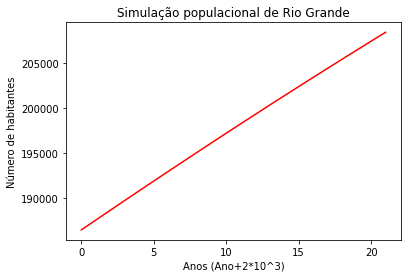

Simulação para 2021: [208447.55940518]


In [13]:
#Solução pelo LSODA
plt.plot(t,sol1,"r")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()

print("Simulação para 2021:",sol1[sol1.shape[0]-1])

<h3>SciPy (LSODA): Limite populacional (L)</h3>

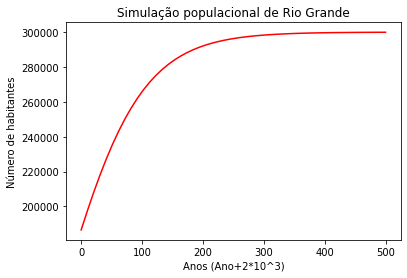

Simulação para 2050: [299922.88006751]


In [14]:
#Solução pelo LSODA
plt.plot(t_lim,sol1_lim,"r")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()

print("Simulação para 2050:",sol1_lim[sol1_lim.shape[0]-1])

<h3>SciPy (RK45): de 2020 à 2021</h3>

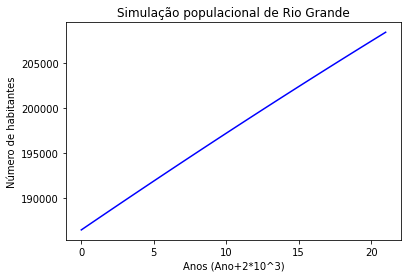

Simulação para 2021: 208447.55725927802


In [15]:
#solução pelo SciPy (RK45)
plt.plot(t,sol2.y[0],"b")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()

print("Simulação para 2021:",sol2.y[0][sol2.y[0].shape[0]-1])

<h3>SciPy (RK45): Limite populacional (L)</h3>

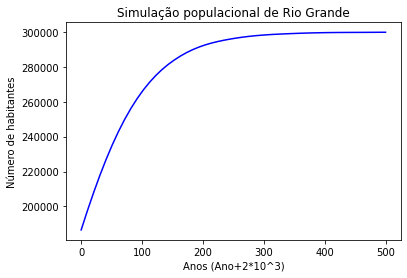

Simulação para 500+2*10^3: 299899.95840515784


In [16]:
#Solução pelo LSODA
plt.plot(t_lim,sol2_lim.y[0],"b")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()

print("Simulação para 500+2*10^3:",sol2_lim.y[0][sol2_lim.y[0].shape[0]-1])